In [2]:
file_path = r"C:\Users\dharris\Downloads\cmdb_ci_appl.csv"

In [4]:
import pandas as pd

def analyze_dataset(filepath):
    # Load the dataset with explicit encoding
    df = pd.read_csv(filepath, encoding='latin1')  # or try 'cp1252' if latin1 doesn't work
    
    print("=== First 5 rows of the dataset ===")
    print(df.head())
    print("\n=== Dataset Info ===")
    print(df.info())
    print("\n=== Summary Statistics for Numerical Columns ===")
    print(df.describe())
    
    # Get categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    print("\n=== Categorical Columns ===")
    print(list(categorical_columns))
    
    return df

# Analyze the dataset
df = analyze_dataset(file_path)

=== First 5 rows of the dataset ===
                                             name  \
0                 *RETIRED Shimadzu GC (Client 1)   
1        *RETIRED Warehouse Vertical Storage Unit   
2  *RETIRED* Electronic Laboratory Notebook (ELN)   
3            2030 Manager Version 4 [MAN-ALE-175]   
4                                            2DGC   

                                   short_description u_business_impact  \
0  Shimadzu Gas Chromatography Instrument used in...               Low   
1  Automated Warehouse racking for efficient stor...               Low   
2  Enterprise ELN (Electronic Lab Notebook system...              High   
3       Plate Reader\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n            Medium   
4           2DGC instrument based in B100 lab at KSP               Low   

  operational_status install_status            owned_by        managed_by  \
0            Retired        Retired  KASIA LACH-FALCONE        Alan Booth   
1            Retired        Retired        Mik

In [5]:
def check_data_consistency(df):
    report = []
    
    # 1. Check for duplicate records
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        report.append(f"Found {duplicates} duplicate rows in the dataset")
        
    # 2. Check business impact values consistency
    valid_impacts = ['Low', 'Medium', 'High']
    invalid_impacts = df[~df['u_business_impact'].isin(valid_impacts) & df['u_business_impact'].notna()]
    if len(invalid_impacts) > 0:
        report.append(f"Found {len(invalid_impacts)} rows with invalid business impact values:")
        report.append(invalid_impacts['u_business_impact'].value_counts().to_string())
    
    # 3. Check operational and install status consistency
    valid_operational = ['Operational', 'Retired']
    valid_install = ['Installed', 'Retired']
    
    status_mismatch = df[
        ((df['operational_status'] == 'Retired') & (df['install_status'] != 'Retired')) |
        ((df['operational_status'] == 'Operational') & (df['install_status'] != 'Installed'))
    ]
    if len(status_mismatch) > 0:
        report.append(f"\nFound {len(status_mismatch)} rows with inconsistent operational/install status:")
        report.append(status_mismatch[['operational_status', 'install_status']].value_counts().to_string())
    
    # 4. Check environment values consistency
    valid_environments = ['Prod', 'NonProd']
    invalid_env = df[~df['u_environment'].isin(valid_environments) & df['u_environment'].notna()]
    if len(invalid_env) > 0:
        report.append(f"\nFound {len(invalid_env)} rows with invalid environment values:")
        report.append(invalid_env['u_environment'].value_counts().to_string())
    
    # 5. Check GXP and SOX values consistency
    valid_yes_no = ['Yes', 'No']
    invalid_gxp = df[~df['u_gxp1'].isin(valid_yes_no) & df['u_gxp1'].notna()]
    invalid_sox = df[~df['u_sox1'].isin(valid_yes_no) & df['u_sox1'].notna()]
    
    if len(invalid_gxp) > 0:
        report.append(f"\nFound {len(invalid_gxp)} rows with invalid GXP values:")
        report.append(invalid_gxp['u_gxp1'].value_counts().to_string())
    
    if len(invalid_sox) > 0:
        report.append(f"\nFound {len(invalid_sox)} rows with invalid SOX values:")
        report.append(invalid_sox['u_sox1'].value_counts().to_string())
    
    # 6. Check for missing critical values
    missing_values = df[['name', 'operational_status', 'install_status']].isnull().sum()
    if missing_values.sum() > 0:
        report.append("\nMissing critical values:")
        report.append(missing_values[missing_values > 0].to_string())
    
    return "\n".join(report)

# Run the consistency check
print(check_data_consistency(df))

Found 3 duplicate rows in the dataset
Found 40 rows with invalid business impact values:
u_business_impact
Critical    40

Found 19 rows with inconsistent operational/install status:
operational_status  install_status 
Operational         In Maintenance     15
                    Pending Install     3
                    Absent              1

Found 70 rows with invalid environment values:
u_environment
Dev     51
Test    19


In [6]:
operational_df = df[df['operational_status'] == 'Operational'].copy()
print(f"Number of operational applications: {len(operational_df)}")
print("\nFirst few rows of operational applications:")
print(operational_df.head())

Number of operational applications: 609

First few rows of operational applications:
                    name                                  short_description  \
4                   2DGC           2DGC instrument based in B100 lab at KSP   
6                   7Zip      7zip tool (File compression / uncompression)    
8   ACD Method Selection  ACD/Method Selection Suite is your software as...   
9                ACD NMR  The ACD/NMR Workbook Suite is a comprehensive ...   
10           ACD Package  ChemSketch , Percepta , Spectrus\r\nLicense Re...   

   u_business_impact operational_status install_status        owned_by  \
4                Low        Operational      Installed  Sujira Hossain   
6                Low        Operational      Installed      Rob Rhoads   
8             Medium        Operational      Installed  Dominika Knych   
9             Medium        Operational      Installed  Dominika Knych   
10            Medium        Operational      Installed  Antoine Millet

In [7]:
operational_prod_df = operational_df[operational_df['u_environment'] == 'Prod'].copy()
print(f"Number of operational applications in Production: {len(operational_prod_df)}")
print("\nFirst few rows of operational Production applications:")
print(operational_prod_df.head())

Number of operational applications in Production: 527

First few rows of operational Production applications:
                    name                                  short_description  \
4                   2DGC           2DGC instrument based in B100 lab at KSP   
6                   7Zip      7zip tool (File compression / uncompression)    
8   ACD Method Selection  ACD/Method Selection Suite is your software as...   
9                ACD NMR  The ACD/NMR Workbook Suite is a comprehensive ...   
10           ACD Package  ChemSketch , Percepta , Spectrus\r\nLicense Re...   

   u_business_impact operational_status install_status        owned_by  \
4                Low        Operational      Installed  Sujira Hossain   
6                Low        Operational      Installed      Rob Rhoads   
8             Medium        Operational      Installed  Dominika Knych   
9             Medium        Operational      Installed  Dominika Knych   
10            Medium        Operational      

C:\Users\dharris\AppData\Local\Temp\ipykernel_16456\2880221166.py:22: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dharris\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


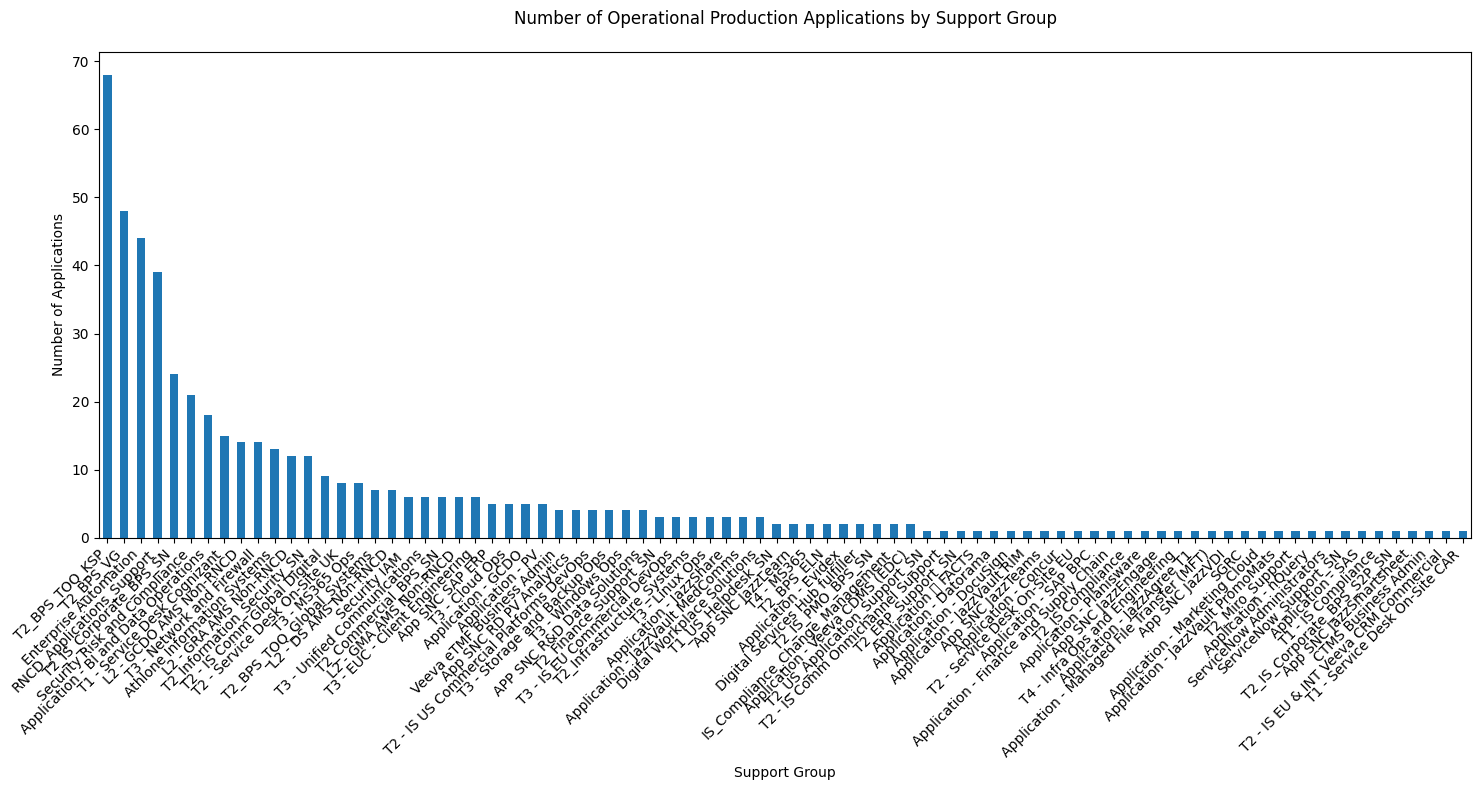

In [8]:
# Create a bar plot of operational production applications by support group
import matplotlib.pyplot as plt

# Count the number of applications per support group
support_group_counts = operational_prod_df['support_group'].value_counts()

# Create a figure with larger size
plt.figure(figsize=(15, 8))

# Create bar plot
support_group_counts.plot(kind='bar')

# Customize the plot
plt.title('Number of Operational Production Applications by Support Group', pad=20)
plt.xlabel('Support Group')
plt.ylabel('Number of Applications')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\dharris\AppData\Local\Temp\ipykernel_16456\2478486381.py:23: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dharris\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


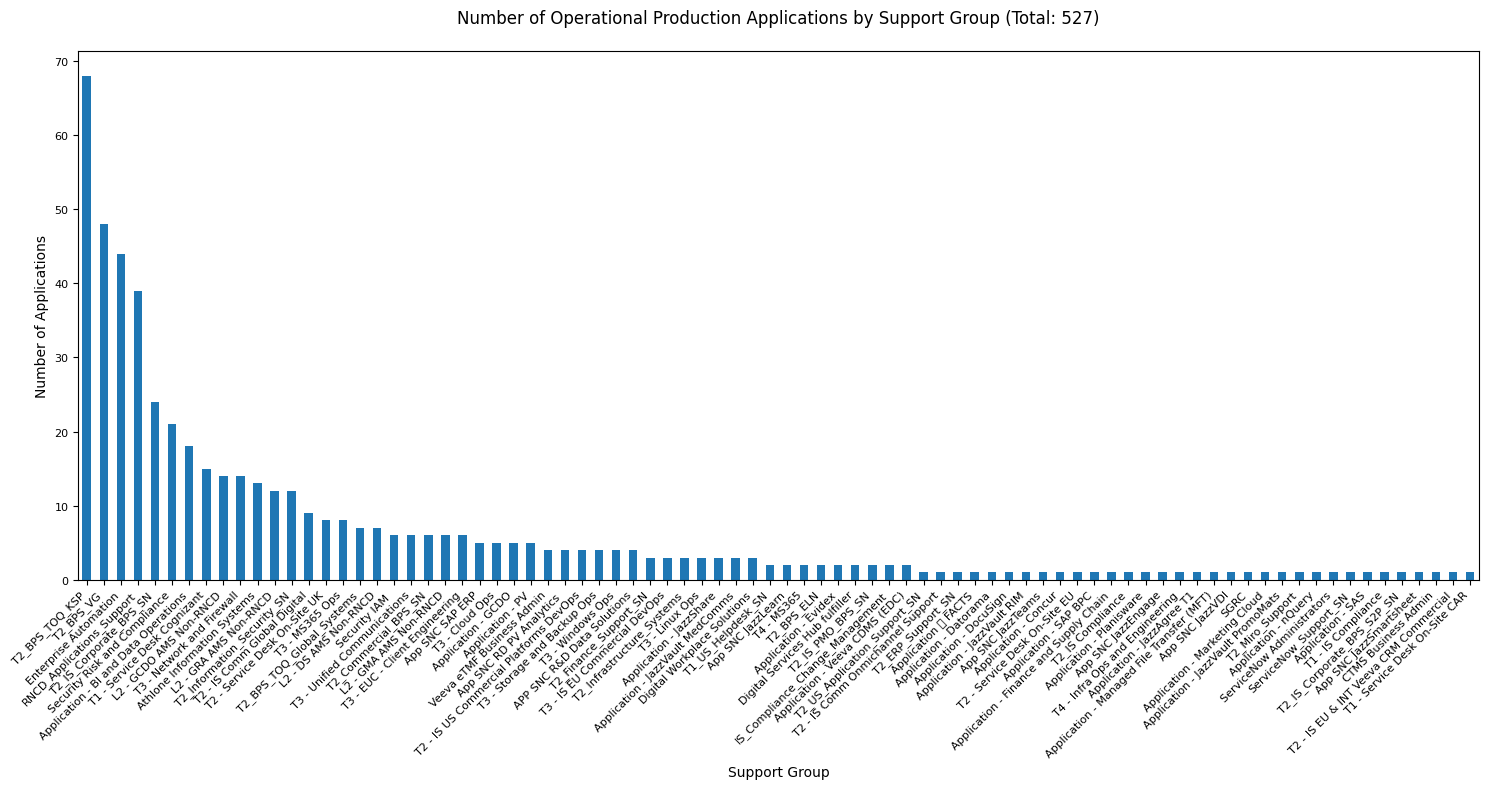

In [9]:
# Create a bar plot of operational production applications by support group
import matplotlib.pyplot as plt

# Count the number of applications per support group
support_group_counts = operational_prod_df['support_group'].value_counts()

# Create figure with larger size 
plt.figure(figsize=(15, 8))

# Create bar plot
support_group_counts.plot(kind='bar')

# Customize the plot
plt.title('Number of Operational Production Applications by Support Group (Total: 527)', pad=20)
plt.xlabel('Support Group')
plt.ylabel('Number of Applications')

# Rotate and adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

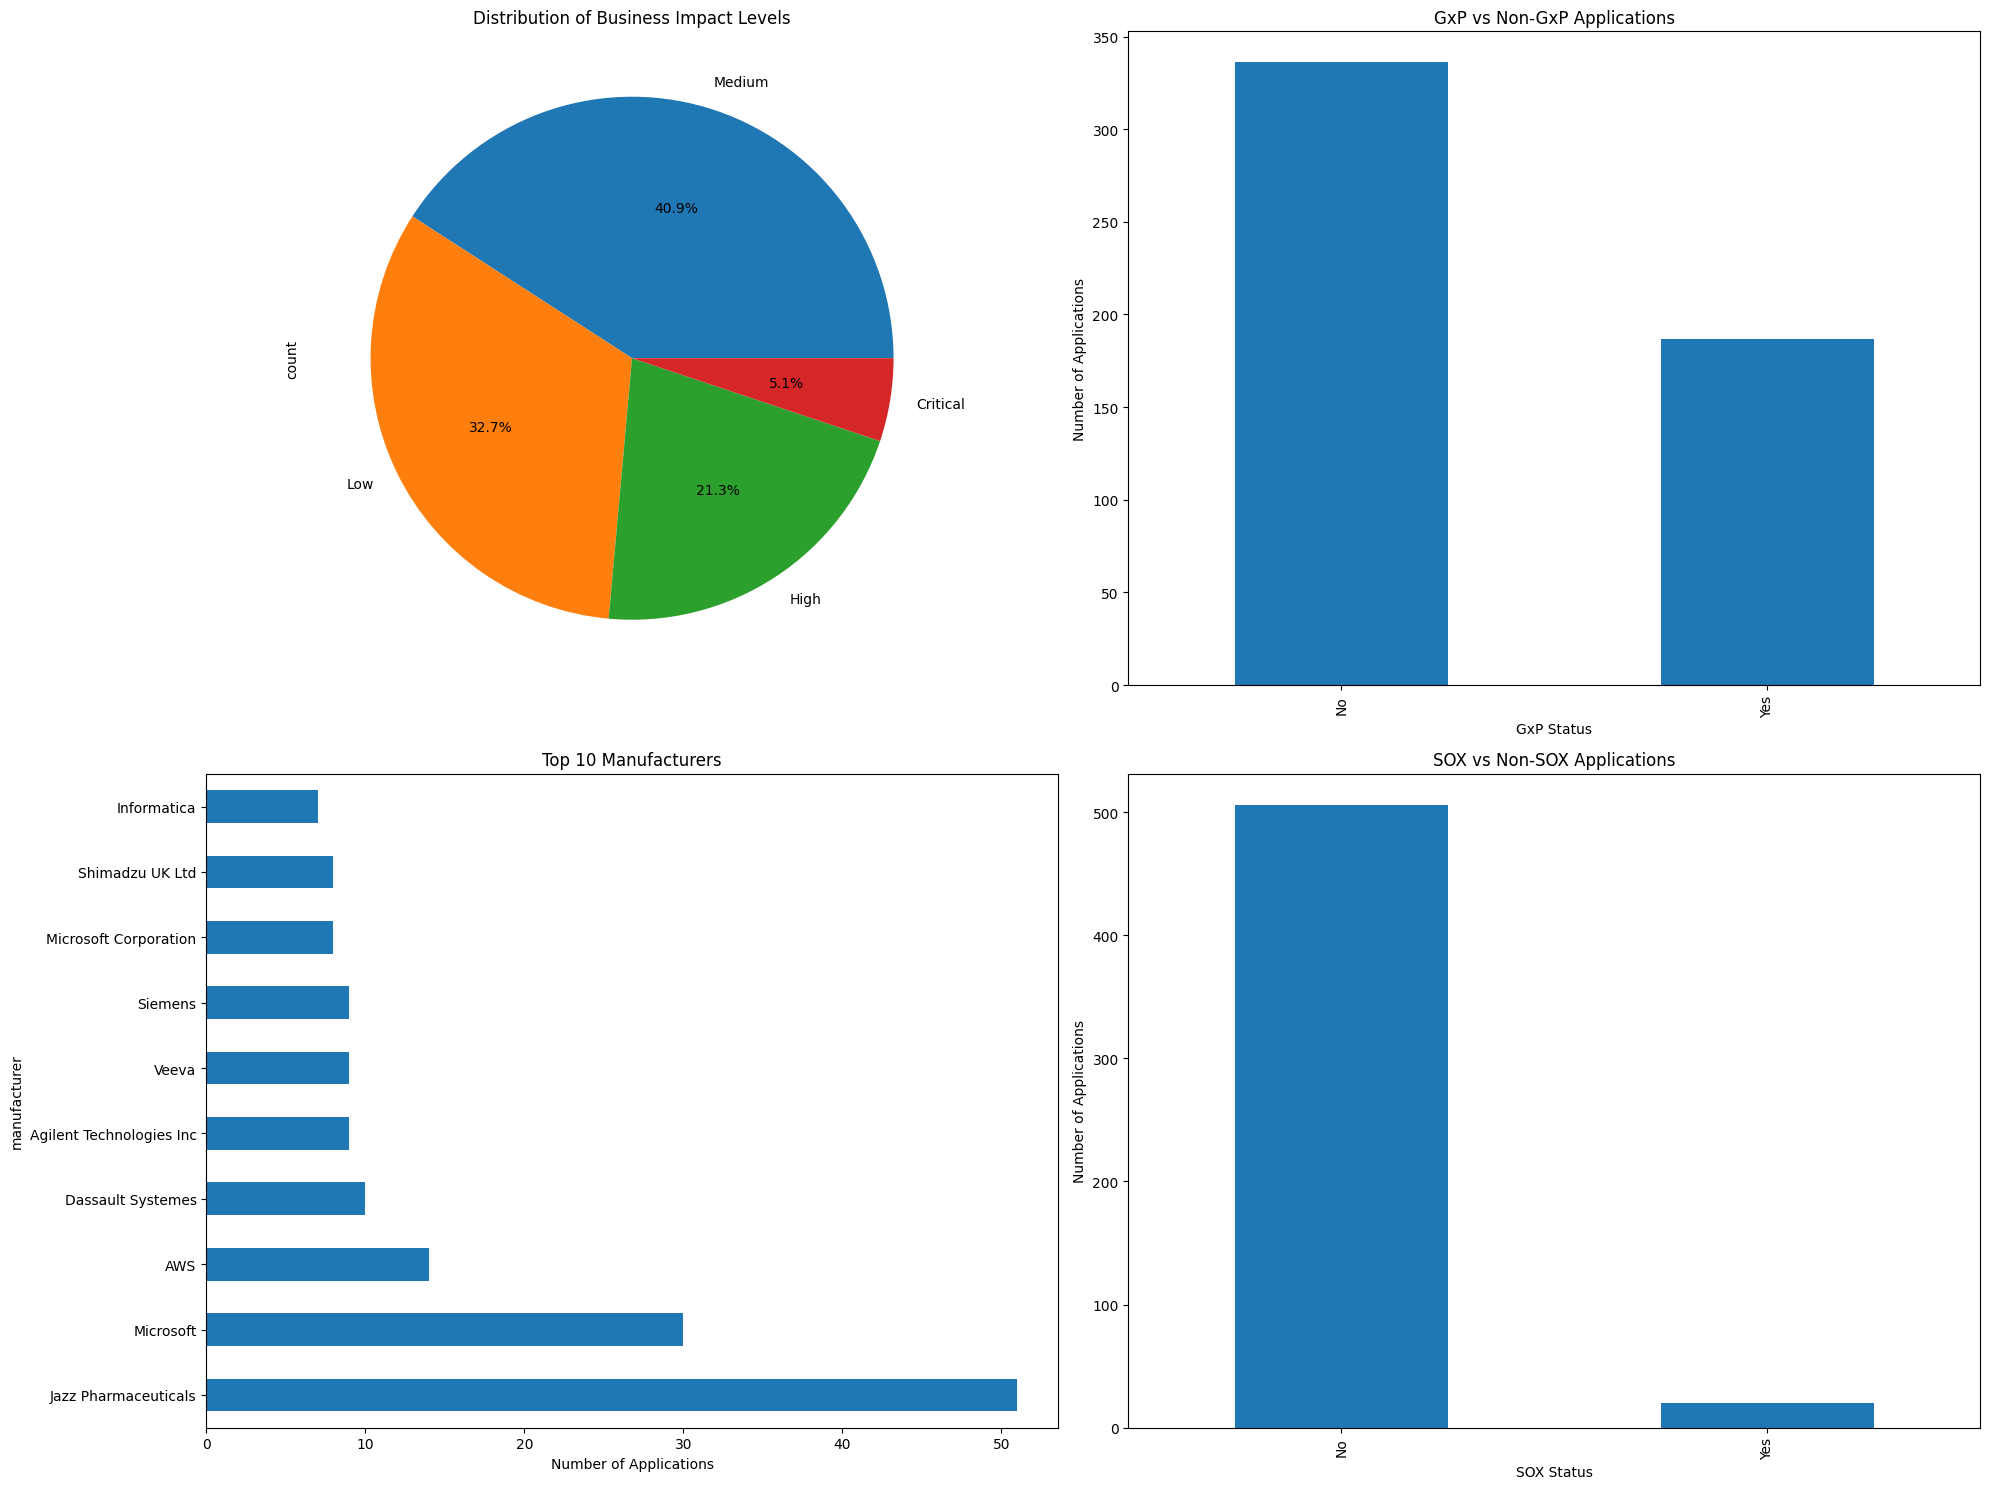

In [10]:
# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

# 1. Business Impact Distribution
plt.subplot(2, 2, 1)
operational_prod_df['u_business_impact'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Business Impact Levels')

# 2. GxP vs Non-GxP Applications
plt.subplot(2, 2, 2)
operational_prod_df['u_gxp1'].value_counts().plot(kind='bar')
plt.title('GxP vs Non-GxP Applications')
plt.xlabel('GxP Status')
plt.ylabel('Number of Applications')

# 3. Top 10 Manufacturers
plt.subplot(2, 2, 3)
operational_prod_df['manufacturer'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Manufacturers')
plt.xlabel('Number of Applications')

# 4. SOX Applications Distribution
plt.subplot(2, 2, 4)
operational_prod_df['u_sox1'].value_counts().plot(kind='bar')
plt.title('SOX vs Non-SOX Applications')
plt.xlabel('SOX Status')
plt.ylabel('Number of Applications')

plt.tight_layout()
plt.show()

In [11]:
# Get unique business owners and sort them alphabetically
unique_owners = operational_prod_df['owned_by'].dropna().unique()
unique_owners.sort()

print(f"Total number of unique business owners: {len(unique_owners)}")
print("\nList of unique business owners:")
for owner in unique_owners:
    print(owner)

Total number of unique business owners: 178

List of unique business owners:
Adrian Horne
Aidan O'Connor
Aishwarya Hemanth
Ajay Kara
Alan Silcock
Alberto Blanco
Alberto Ferrario
Alberto Orta
Alejandro Montellano López
Aleksandra Kraszewska
Alex Crawford
Alexander Pollington
Alyza Land
Amar Gor
Amy Williams
Andrew Lee
Andrew Miller
Andy Bracking
Antoine Millet
Ashok Panneerselvam
Aubri Charboneau
Barry Liboiron
Benjamin Clark
Bhaskar Nunna
Bijal Shah
Bill Shieh
Blythe Brandon
Brian Scheckner
Briege Ibanez
Bruno Cherel
Carmel Marren
Caroline Flavin
Chris Caulton
Christina Bozarth
Christopher Dougherty
Claire Beggs
Claudio Verga
Dan Checketts
Daniel Carroll
Daniel Epstein
Danielle Heneks
David Jackson
Debby Chen
Dennis Salotti
Dino Manca
Dominika Knych
Dylan Richardson
Edward Byrne
Elaine Ediin
Eleana Hardy
Elise Conlee
Emanuele Loro
Fabio Beretta
Farid Miah
Federico Tintori
Femi Adams
Gareth Markham
Gina Florida
Giorgio Grasso
Giuseppe Violante
Graham Healy
Hannah Stone
Helen Elliott
Hol

In [23]:
# Create a DataFrame from unique owners and export to CSV
pd.DataFrame(unique_owners, columns=['Owner']).to_csv('unique_owners.csv', index=False)
print("Unique owners exported to 'unique_owners.csv'")

Unique owners exported to 'unique_owners.csv'


In [24]:
operational_prod_df.to_csv('operational_prod_applications.csv', index=True)
print("Operational production applications exported to 'operational_prod_applications.csv'")

Operational production applications exported to 'operational_prod_applications.csv'
